In [1]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

# Part A - 1, Creating Graphs based on input and initial analysis

### Input Dataframes

In [2]:
# Read in the Excel file 'randstad.xlsx' as a dataframe
randstad_network = pd.read_excel('Data_files/Part_1/Graph_randstad.xlsx')

# Show contents of the dataframe
randstad_network

,Locations,Population,Employees,Latitude,Longitude,0,1,2,3,4,...,12,13,14,15,16,17,18,19,20,21
0,Alkmaar,111834,120.154585,52.63160,4.753400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Almere,222825,239.403449,52.35080,5.264700,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Alphen aan de Rijn,114182,122.677279,52.11120,4.647300,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,Amersfoort,160759,172.719664,52.15610,5.387800,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Amsterdam,918117,986.426015,52.36760,4.904100,0,1,0,0,0,...,0,0,1,0,1,0,0,1,1,0
5,Delft,106086,113.978927,52.01160,4.357100,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
6,Den Haag,562839,604.714902,52.07050,4.300700,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7,Dordrecht,121434,130.468836,51.81330,4.690100,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
8,Gouda,75316,80.919601,52.01150,4.710500,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
9,Haarlem,165396,177.701662,52.38740,4.646299,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [3]:
# Make a graph from the dataframe
randstad_network_adjacency = randstad_network.iloc[:, 5:]
Randstad_Graph = nx.from_pandas_adjacency(randstad_network_adjacency)

In [4]:
# This functions adds attributes to the corresponding dataframe to the corresponding graph. The dataframe must contain location, positional and employers attributes.    
def adding_node_attributes(graph, dataframe):  
    # Getting the city names from the original dataframe
    location_names = {}
    # Gathering attributes for the graph
    pos_attributes = {}
    employees_attributes = {}  # For node size drawing, this must be list with data ordered in the order of nodes in the graph
    
    for i, location in enumerate(dataframe['Locations']):
        
        # Location names
        location_names.update({i: location})
        
        # The coordinates
        latitude = dataframe.loc[dataframe['Locations'] == location, 'Latitude'].iloc[0]
        longitude = dataframe.loc[dataframe['Locations'] == location, 'Longitude'].iloc[0]
        pos_attributes.update({i: (longitude, latitude)})
        
        # The employees 
        employees = dataframe.loc[dataframe['Locations'] == location, 'Employees'].iloc[0]
        employees_attributes.update({i: employees})
    
    nx.set_node_attributes(graph, pos_attributes, "pos")
    nx.set_node_attributes(graph, employees_attributes, "employees")
    nx.relabel_nodes(graph, location_names, copy=False)
    
adding_node_attributes(Randstad_Graph, randstad_network)

### Part A - Drawing the graph

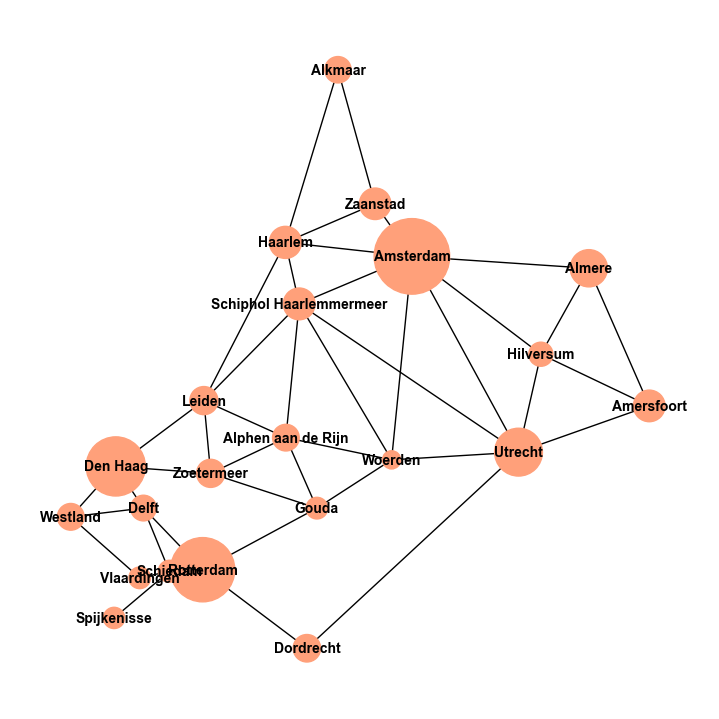

In [5]:
# A function that draws the network graph, it is important that the graphs has employee and positional values
def draw_graph(graph, node_color, edge_dictionary=None, edge_color=None):
    # getting the positional and size values
    pos = nx.get_node_attributes(graph, "pos")
    size_list = []
    for size in nx.get_node_attributes(graph, "employees").values():
        # Prevents places with 0 employees from disappearing
        if size != 0:
            size_list.append(3 * size)
        else:
            size_list.append(100)
    # Drawing  
    plt.figure(figsize=(7, 7))
    nx.draw(graph, 
            pos=pos, 
            with_labels=True, 
            node_size=size_list, 
            node_color=node_color, 
            font_size=10, 
            font_color='black', 
            font_weight='bold'
            )
    
    # If there are edge values given, then these will also be drawn in
    if edge_dictionary is not None:
        # The standard edge label color
        if edge_color is None:
            edge_color = 'red'
        # Drawing in the edges
        nx.draw_networkx_edge_labels(graph, 
                             pos=pos,
                             edge_labels=edge_dictionary,
                             font_color=edge_color,
                             )
        
    plt.show()
    
draw_graph(Randstad_Graph, 'lightsalmon')

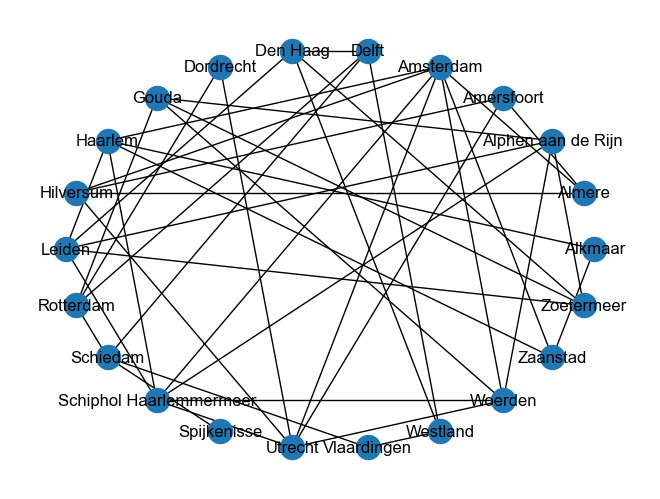

In [6]:
# Plot the graph, using a circular layout
nx.draw_circular(Randstad_Graph, with_labels=True)

### Adding Attributes

##### Now let's introduce the times of the routes in our graph

The next part of this notebook will include the times of the car routes as attributes in our graph.
This allows us to do more fruitful and fun analyses!
But first we have to load them in from a xlsx sheet and create a dataframe.
Then we modify this dataframe to subtract edge attributes.
Which we then will add in our graph.
Let's go!

In [7]:
# This functions allows the adding of edge attributes/weights to the Randstad network, based on a delivered dataframe with these attributes and a chosen attribute name
def adding_edge_attributes(graph, attribute_dataframe, name_attribute):    
    # Creating a dictionary to store all edges attributes in
    attribute_dictionary = {}
    
    # Use the already existing Randstad graph to look up the existing edges
    for edge in graph.edges():
        source, target = edge
        # Take the distance from the dataframe with all the car travel times
        value_attribute = attribute_dataframe.at[source, target]
        # Update those in one dictionary with edges as key and the distance as value
        attribute_dictionary.update({edge : value_attribute})
    
    
    # Update the Randstad graph with the newly configured car travel times
    nx.set_edge_attributes(graph, attribute_dictionary, name_attribute)
    
    return attribute_dictionary

In [8]:
# Reading the times from the Excel sheet
randstad_car_distance = pd.read_excel('Data_files/Part_1/Randstad_car_distance.xlsx')
randstad_car_times = pd.read_excel('Data_files/Part_1/Randstad_car_times.xlsx')

# Clean up the DataFrame, so extraction is easier, here we make the cities columns also the indices
randstad_car_distance.set_index('Locations', inplace=True)
randstad_car_times.set_index('Locations', inplace=True)
randstad_car_times

,Alkmaar,Almere,Alphen aan de Rijn,Amersfoort,Amsterdam,Delft,Den Haag,Dordrecht,Gouda,Haarlem,...,Rotterdam,Schiedam,Schiphol Haarlemmermeer,Spijkenisse,Utrecht,Vlaardingen,Westland,Woerden,Zaanstad,Zoetermeer
Locations,,,,,,,,,,,,,,,,,,,,,
Alkmaar,x,x,x,x,x,x,x,x,x,26,...,x,x,x,x,x,x,x,x,24,x
Almere,x,x,x,37,28,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
Alphen aan de Rijn,x,x,x,x,x,x,x,x,26,x,...,x,x,22,x,x,x,x,22,x,22
Amersfoort,x,37,x,x,38,x,x,x,x,x,...,x,x,x,x,23,x,x,x,x,x
Amsterdam,x,28,x,38,x,x,x,x,x,25,...,x,x,21,x,40,x,x,41,16,x
Delft,x,x,x,x,x,x,20,x,x,x,...,20,23,x,x,x,20,23,x,x,21
Den Haag,x,x,x,x,x,20,x,x,x,x,...,x,x,x,x,x,x,18,x,x,18
Dordrecht,x,x,x,x,x,x,x,x,x,x,...,27,x,x,x,44,x,x,x,x,x
Gouda,x,x,26,x,x,x,x,x,x,x,...,28,x,x,x,x,x,x,21,x,20


In [9]:
distance_dictionary = adding_edge_attributes(Randstad_Graph, randstad_car_distance, 'length')
time_dictionary = adding_edge_attributes(Randstad_Graph, randstad_car_times, 'time')

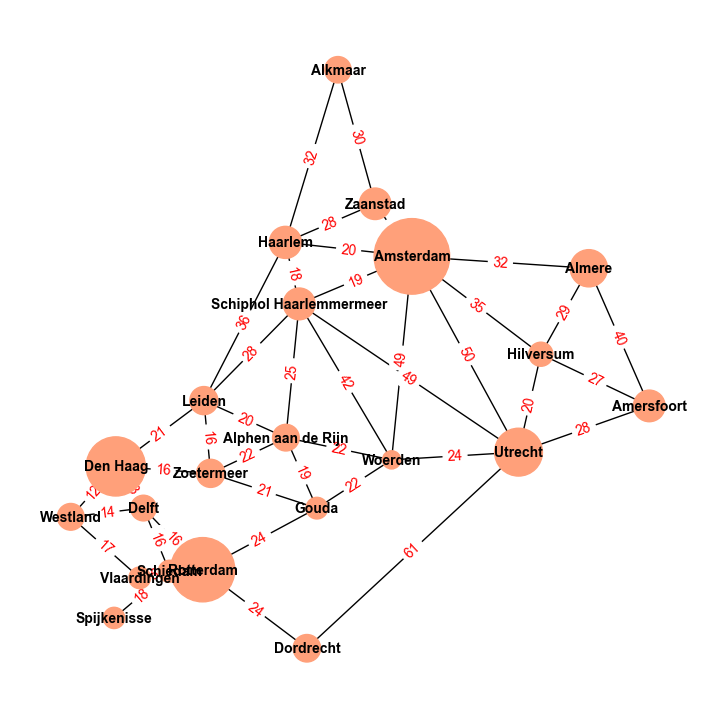

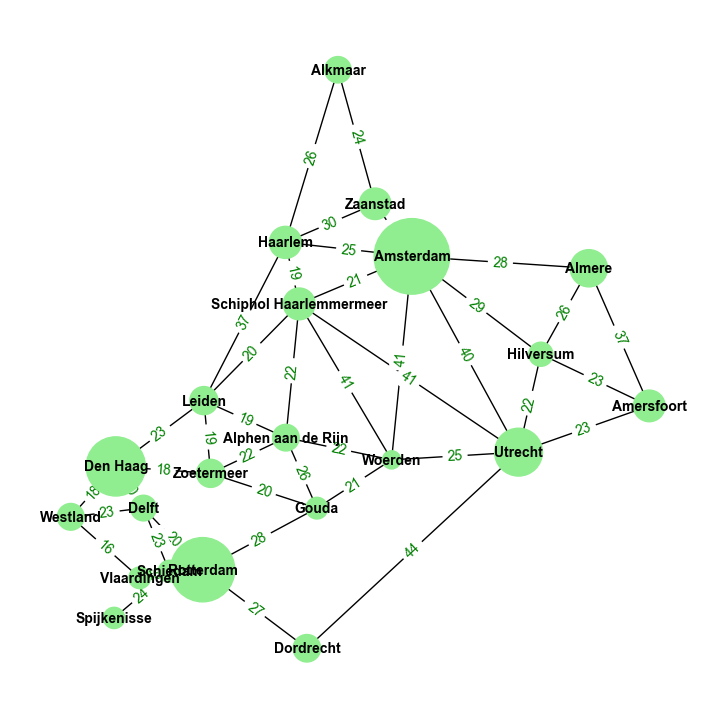

In [10]:
draw_graph(Randstad_Graph, 'lightsalmon', edge_dictionary=distance_dictionary, edge_color='red')
draw_graph(Randstad_Graph, 'lightgreen', edge_dictionary=time_dictionary, edge_color='green')

### Plotting Characteristics

Here we plot the fundamental characteristics of our created graphs.

C:\Users\jvlan\AppData\Local\Temp\ipykernel_35584\2135788565.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betweenness.set_xticklabels(G_betweenness.get_xticklabels(), rotation=90, color='black', ha='center')


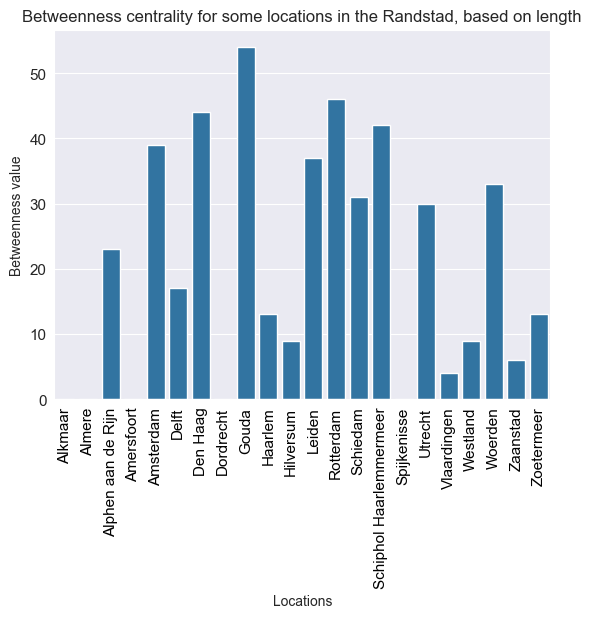

C:\Users\jvlan\AppData\Local\Temp\ipykernel_35584\2135788565.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betweenness.set_xticklabels(G_betweenness.get_xticklabels(), rotation=90, color='black', ha='center')


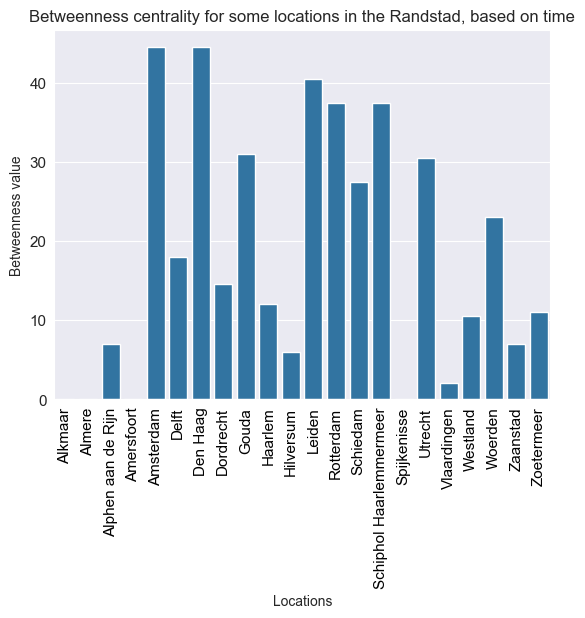

In [11]:
# plotting betweenness function
def plot_betweenness(graph, graph_name, weight=None):
    #Calculate the betweenness centrality, don't normalize
    betweenness = nx.betweenness_centrality(graph,k=None,normalized=False, weight=weight)
    # Plot the values in a bar chart
    G_betweenness = sns.barplot(betweenness)
    if weight is not None:
        G_betweenness.set_title(f"Betweenness centrality for some locations in the {graph_name}, based on {weight}")
    else:
        G_betweenness.set_title(f"Betweenness centrality for some locations in the {graph_name}")
    G_betweenness.set_xticklabels(G_betweenness.get_xticklabels(), rotation=90, color='black', ha='center')
    G_betweenness.tick_params(direction='out', pad=2, labelsize=11)
    G_betweenness.set(xlabel='Locations', ylabel='Betweenness value')
    plt.show()
    
plot_betweenness(Randstad_Graph, 'Randstad', weight='length')
plot_betweenness(Randstad_Graph, 'Randstad', weight='time')

In [12]:
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weighted_distance = nx.edge_betweenness_centrality(Randstad_Graph,
                                                                    k=None,
                                                                    normalized=True,
                                                                    weight='length',
                                                                    seed=None)
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weighted_time = nx.edge_betweenness_centrality(Randstad_Graph,
                                                                k=None,
                                                                normalized=True,
                                                                weight='time',
                                                                seed=None)

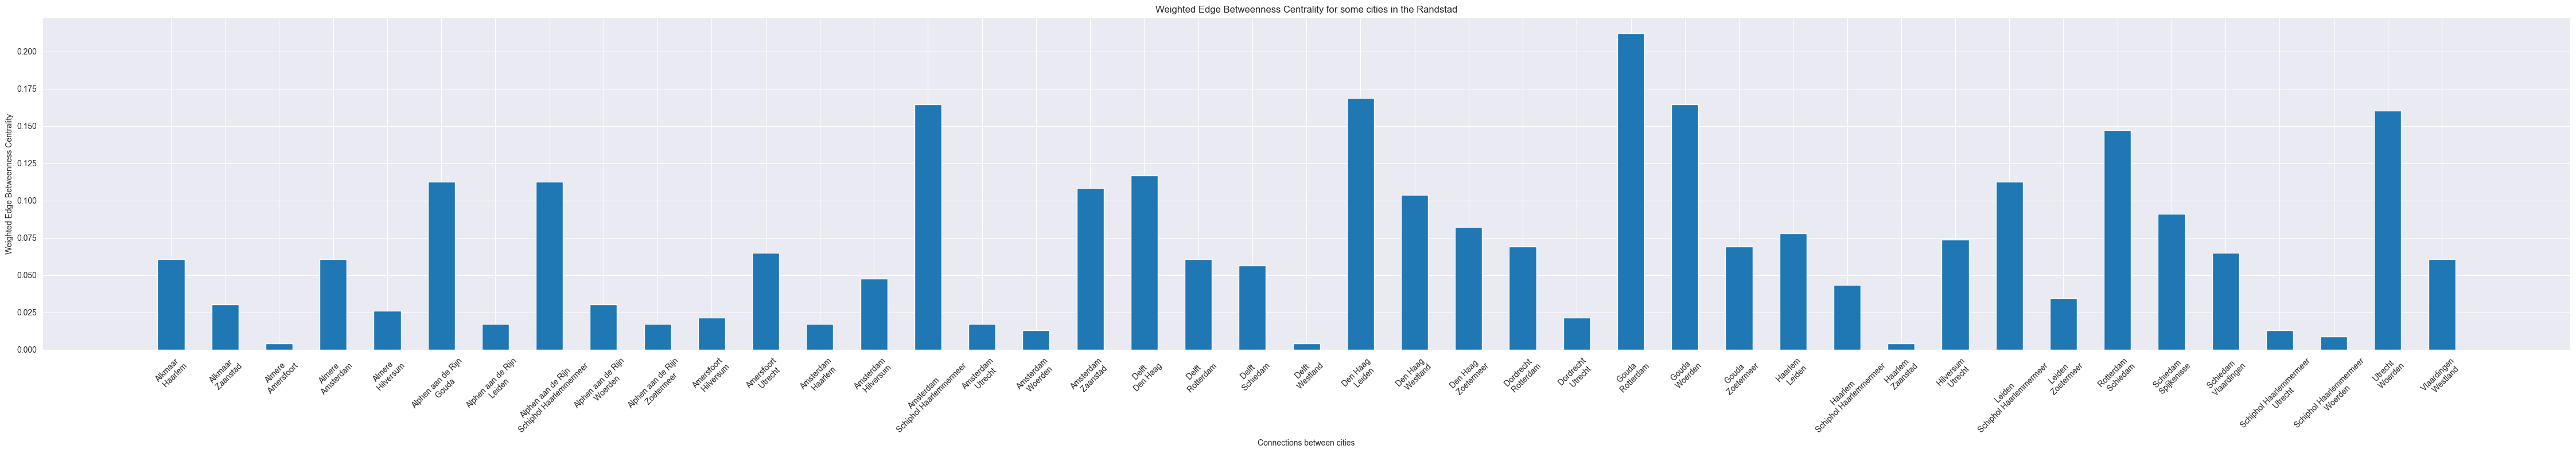

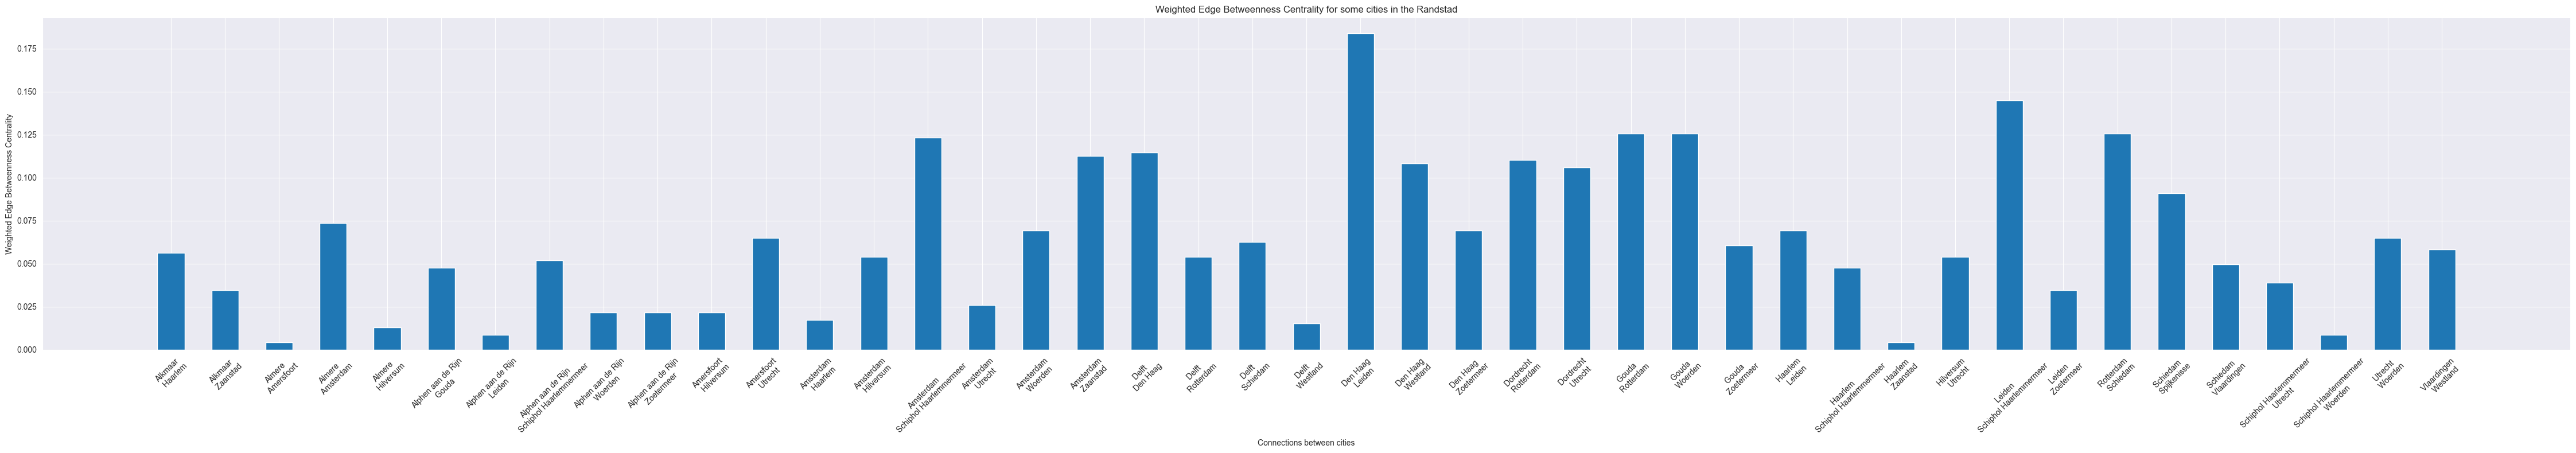

In [13]:
# Helper function for parsing the edge labels
def pp_edges(l):
    rl = []
    for i in range(len(l)):
        rl.append(str(l[i][0]) + ' \n ' + str(l[i][1]))
    return rl

# Plot the values in a bar chart
plt.figure(figsize=(45, 8))
plt.bar(range(len(edge_betweenness_weighted_distance)), edge_betweenness_weighted_distance.values(), width=0.5)
plt.xticks(range(len(edge_betweenness_weighted_distance)), pp_edges(list(edge_betweenness_weighted_distance.keys())), rotation=45, ha='center')
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.tight_layout()
plt.show()

# Plot the values in a bar chart
plt.figure(figsize=(45, 8))
plt.bar(range(len(edge_betweenness_weighted_time)), edge_betweenness_weighted_time.values(), width=0.5)
plt.xticks(range(len(edge_betweenness_weighted_time)), pp_edges(list(edge_betweenness_weighted_time.keys())), rotation=45, ha='center')
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.tight_layout()
plt.show()

# Part A - 2, Finding the Offices

### Route Calculations

##### Now we are going to use two different ways to calculate the travel times or distances to two offices

With the first couple of methods, all travel times to both respective offices (read destination cities) are calculated and the minimum times with the corresponding offices are selected.

In reality though, people would only consider the travel time or distance to their nearest office. Thus, in the methods thereafter, only the travel times from each city to their respective nearest office are taken into account. Furthermore, these sophisticated functions also take into account the total amount of employees that is in each city and has to travel to their nearest office. This makes cities with lots of employees weigh more in their travel time or distance calculations to the nearest office.

These times or distances will then be minimised by investigating every possible combination of office/destination cities and picking those with the lowest total travel time or distance form each city in the graph.

We also have to consider the way employees travel. Traveling from location to location is different whether the traveller actually intents to visit a location or is merely passing by. In the latter case one would travel significantly faster since they are not going to the location center and stay on the road/highway that happens to pass by a location in a graph.

In [44]:
# A function to choose the quickest or shortest (depending on selected weight) path between source and target node, returns dict like object if either source and/or target is None. This modified version takes into account whether the locations visited are the final destination or in-between-stops on a path. In the latter case there is a time correction applied so the travel times reflect reality better.
def shortest_path(graph, source=None, target=None, weight=None):
    short_path = nx.shortest_path(graph, source=source, target=target, weight=weight)
    return short_path

def path_weight(graph, path, weight):
    # The standard path_weight is determined
    path_weight = nx.path_weight(graph, path, weight=weight)
    
    # Corrections for in-between-stops based on the mode of transport, the car times get a reduction, the ov an extra
    # This simulates remaining on the road with a car (so shorter) and changing public transport transfers (an extra)
    total_correction_factor = 0
    correction_factors = {'time': -8}
    parking_correction = 5
        
    # The path must have in-between-stops and the weight must be due for a correction
    if len(path) > 2 and weight in list(correction_factors.keys()):
        total_correction_factor = correction_factors[weight] * (len(path[1:-1]))
    
    # Adding a parking correction
    if weight == 'time':
        total_correction_factor += parking_correction

    # Correct the path weight
    path_weight += total_correction_factor
    
    
    return path_weight
        

# Testing area to see whether the functions work
path1 = shortest_path(Randstad_Graph, 'Amsterdam', 'Delft', weight='length')
print(path1)
print(f'{path_weight(Randstad_Graph, path1, weight='length')} km')
print(f'{path_weight(Randstad_Graph, path1, weight='time')} minutes\n')

path1a = shortest_path(Randstad_Graph, 'Amsterdam', 'Delft', weight='time')
print(path1a)
print(f'{path_weight(Randstad_Graph, path1a, weight='length')} km')
print(f'{path_weight(Randstad_Graph, path1a, weight='time')} minutes\n')

# Testing area to see whether the functions work
path2 = shortest_path(Randstad_Graph, 'Amsterdam', 'Rotterdam', weight='time')
print(path2)
print(f'{path_weight(Randstad_Graph, path2, weight='length')} km')
print(f'{path_weight(Randstad_Graph, path2, weight='time')} minutes')

SyntaxError: f-string: unmatched '(' (809625713.py, line 34)

In [17]:
# A function where only the travel time to the closest office is taken into consideration
# Furthermore the function takes into account how many employees per starting city have to travel to the closest office
# It thus calculates the total employee travel time or distance to the closest office and sums this up. 
# The weight attribute depends on the use of time or distance.
def travel_amount_car_closest_office(graph, office_1, office_2, weight):
    # Creates two dicts with all the paths to the offices from every node
    all_paths_1 = shortest_path(graph, target=office_1, weight=weight)
    all_paths_2 = shortest_path(graph, target=office_2, weight=weight)
    
    # Find for every starting node the closest office with corresponding travel time or distance and sum these together
    total_employee_amount_office_closest_office = 0
    
    for starting_city in graph.nodes():
        # The quickest paths to both offices
        path_1 = all_paths_1[starting_city]
        path_2 = all_paths_2[starting_city]
        
        # The duration or distance of these paths
        travel_amount_1 = path_weight(graph, path_1, weight=weight)
        travel_amount_2 = path_weight(graph, path_2, weight=weight)
        
        # Only the time or distance of the closest office is used factored by the amount of employees traveling/distance this time
        city_employees = graph.nodes[starting_city]['employees']
        total_employee_amount_office_closest_office += min(travel_amount_1, travel_amount_2) * city_employees
        
    return total_employee_amount_office_closest_office

print(f'The average employee travel distance with the offices, Schiphol Haarlemmermeer and Zoetermeer: {(travel_amount_car_closest_office(Randstad_Graph, 'Schiphol Haarlemmermeer', 'Zoetermeer', 'length'))/5000}')

print(f'The average employee travel time with the offices, Schiphol Haarlemmermeer and Zoetermeer: {(travel_amount_car_closest_office(Randstad_Graph, 'Schiphol Haarlemmermeer', 'Zoetermeer', 'time'))/5000}')

SyntaxError: f-string: unmatched '(' (1580108492.py, line 28)

In [18]:
import itertools

# This function finds the combination of offices with the least amount of travel to the office of all employees. It looks per combination per city what the closest office is and weighs this with the amount of employees for said city. The combination that results in the lowest travel amount weighted for each starting city with corresponding employee numbers is given as output, including the average travel amount for all employees to their nearest office and the total minimal travel amount per employee. Only the closest office is taken into consideration per starting city. The weight attribute depends on the use of time or distance.
def minimise_travel_amount_closest_office(graph, weight):
    # Set up the minimum travel amount of both offices
    minimum_travel_amount_all_employees = np.inf
    selected_office_1 = ''
    selected_office_2 = ''
    average_travel_amount_selected_office_1 = 0
    average_travel_amount_selected_office_2 = 0
    
    # Create a list of all possible office combinations in all cities, the offices need to be in two different cities. This uses a tool called itertools combinations, which creates all unique possible combinations out of a list of unique elements.
    office_list = [i for i in graph.nodes()]
    office_combinations = itertools.combinations(office_list, 2)
    
    # Run through these combinations to find the minimum travel time and the corresponding offices
    for combination in office_combinations:
        # Get the office from the combination
        office_1, office_2 = combination
        
        # Travel amount from selected city for all employees from said city
        total_employee_travel_amount_office_1 = 0
        total_employee_travel_amount_office_2 = 0
        employees_office_1 = 0
        employees_office_2 = 0
    
        for i, city in enumerate(graph.nodes()):
            
            # It looks at the amount of employees that have to travel to this office
            city_employees = graph.nodes[city]['employees']
            
            # Paths to both offices
            path_1 = shortest_path(graph, source=city, target=office_1, weight=weight)
            path_2 = shortest_path(graph, source=city, target=office_2, weight=weight)
            
            # The duration of these paths
            travel_amount_1 = path_weight(graph, path_1, weight=weight)
            travel_amount_2 = path_weight(graph, path_2, weight=weight)
            
            # If office one is closer, the node gets recolored, the other ones (to office 2) keep their color
            if travel_amount_1 > travel_amount_2:
                total_employee_travel_amount_office_2 += travel_amount_2 * city_employees
                employees_office_2 += city_employees            
            else:
                total_employee_travel_amount_office_1 += travel_amount_1 * city_employees
                employees_office_1 += city_employees
        
        average_travel_amount_office_1 = total_employee_travel_amount_office_1 / employees_office_1
        average_travel_amount_office_2 = total_employee_travel_amount_office_2 / employees_office_2
        
        total_amount_all_offices = total_employee_travel_amount_office_1 + total_employee_travel_amount_office_2
        
        if minimum_travel_amount_all_employees > total_amount_all_offices: 
            minimum_travel_amount_all_employees = total_amount_all_offices
            average_travel_amount_selected_office_1 = average_travel_amount_office_1
            average_travel_amount_selected_office_2 = average_travel_amount_office_2
            selected_office_1 = office_1
            selected_office_2 = office_2
            
    return selected_office_1,average_travel_amount_selected_office_1,selected_office_2,average_travel_amount_selected_office_2,minimum_travel_amount_all_employees

selected_office_1,average_travel_amount_selected_office_1_distance,selected_office_2,average_travel_amount_selected_office_2_distance,minimum_travel_distance_all_employees = minimise_travel_amount_closest_office(Randstad_Graph, 'length')

selected_office_1_time,average_travel_amount_selected_office_1,selected_office_2_time,average_travel_amount_selected_office_2,minimum_travel_time_all_employees = minimise_travel_amount_closest_office(Randstad_Graph, 'time')

print(f'The minimised employee travel distance resulted in the offices: {selected_office_1} and {selected_office_2}\nWith and average employee travel distance of : {minimum_travel_distance_all_employees/5000} kilometer')
print('\n')
print(f'The minimised employee travel time resulted in the offices: {selected_office_1_time} and {selected_office_2_time}\nWith and average employee travel time of : {minimum_travel_time_all_employees/5000} minutes')

NameError: name 'shortest_path' is not defined

### Now we start plotting in the office locations

But first let's make some auxiliary functions

In [ ]:
# A function that gives each node/city in the graph a color, one for the selected offices / destination nodes, the other for the closest to office one and the last for the closest to office two. The weight attribute depends on the use of time or distance.
def coloring_nodes_offices(graph, office_1, office_2, weight):
    node_color_list = []
    for i, city in enumerate(graph.nodes()):
        node_color_list.append('lightsalmon')
        if city in [office_1, office_2]:
            node_color_list[i] = 'lightblue'
        else:
            # Paths to both offices
            path_1 = shortest_path(graph, source=city, target=office_1, weight=weight)
            path_2 = shortest_path(graph, source=city, target=office_2, weight=weight)
            
            # The duration of these paths
            travel_amount_1 = path_weight(graph, path_1, weight=weight)
            travel_amount_2 = path_weight(graph, path_2, weight=weight)
            # If office one is closer, the node gets recolored, the other ones (to office 1) keep their color
            if travel_amount_1 > travel_amount_2:
                node_color_list[i] = 'lightgreen'
                
    return node_color_list

color_list_distance = coloring_nodes_offices(Randstad_Graph, 'Amsterdam', 'Rotterdam', 'length')
color_list_time = coloring_nodes_offices(Randstad_Graph, 'Amsterdam', 'Rotterdam', 'time')

draw_graph(Randstad_Graph, color_list_distance, edge_dictionary=distance_dictionary, edge_color='red')
draw_graph(Randstad_Graph, color_list_time, edge_dictionary=time_dictionary, edge_color='green')

In [ ]:
# Function that only takes one office into consideration and calculates the travel amount to said one office.
def one_office(graph, weight):
    
    # First define the desired variables
    total_path_amount = np.inf
    closest_office = ''
    total_amount_of_employees = 0
    
    # For each office in the graph do the calculations
    for office in graph.nodes():
        
        # For every office it restarts the travel counter
        total_employee_travel_amount = 0
        total_amount_of_employees += graph.nodes[office]['employees']
        
        # For each city in the graph it calculates and sums the time towards this office
        for start_city in graph.nodes():
            
            # It looks at the amount of employees that have to travel to this office
            city_employees = graph.nodes[start_city]['employees']
            
            short_path = shortest_path(graph, source=start_city, target=office, weight=weight)
            total_employee_travel_amount += path_weight(graph, short_path, weight=weight) * city_employees
            
        if total_path_amount > total_employee_travel_amount:
            total_path_amount = total_employee_travel_amount
            closest_office = office
    
    # It corrects the office travel amount for the total amount of employees
    total_path_amount = total_path_amount/total_amount_of_employees
    
    return total_path_amount, closest_office
        
time, most_desired = one_office(Randstad_Graph, 'length')
print(f'The most desired office is {most_desired} with a travel time of {time} minutes\n')

In [ ]:
# A function that gives the travel amounts to the closest office only and the average travel amount and also two list of cities each for their closest office respectively
def average_amount_per_office(graph, office_1, office_2, weight):
    # All nodes to their closest office
    node_list_office_1 = []
    node_list_office_2 = []
    
    # Travel amount from selected city for all employees from said city
    total_employee_travel_amount_office_1 = 0
    total_employee_travel_amount_office_2 = 0
    employees_office_1 = 0
    employees_office_2 = 0
    
    for i, city in enumerate(graph.nodes()):
        
        # It looks at the amount of employees that have to travel to this office
        city_employees = graph.nodes[city]['employees']
        
        # Paths to both offices
        path_1 = shortest_path(graph, source=city, target=office_1, weight=weight)
        path_2 = shortest_path(graph, source=city, target=office_2, weight=weight)
        
        # The duration of these paths
        travel_amount_1 = path_weight(graph, path_1, weight=weight)
        travel_amount_2 = path_weight(graph, path_2, weight=weight)
        
        # If office one is closer, the node gets recolored, the other ones (to office 2) keep their color
        if travel_amount_1 > travel_amount_2:
            node_list_office_2.append(city)
            total_employee_travel_amount_office_2 += travel_amount_2 * city_employees
            employees_office_2 += city_employees            
        else:
            node_list_office_1.append(city)
            total_employee_travel_amount_office_1 += travel_amount_1 * city_employees
            employees_office_1 += city_employees
            
    average_travel_amount_office_1 = total_employee_travel_amount_office_1 / employees_office_1
    if employees_office_2 != 0:
        average_travel_amount_office_2 = total_employee_travel_amount_office_2 / employees_office_2
    else:
        average_travel_amount_office_2 = 'not relevant'
    
    return node_list_office_1, average_travel_amount_office_1, node_list_office_2, average_travel_amount_office_2

average_amount_per_office(Randstad_Graph, 'Amsterdam', 'Rotterdam', 'time')

# Part B - 1 , A closer study to the Rotterdam Area

In this graph we will work with a new graph about the Rotterdam area and study the connectivity and travel amounts here. The values about employer numbers and connections types can be taken from the previous part. Furthermore, we will study different types of modularity in this local network.

<br>

Continue with one of the cities you have chosen in the previous questions and investigate the trade-off between settling in a central location close to a major trainstation or in a more peripheral location close to a highway. 

Investigate the influence of travel time of the company’s employees for two modalities: commuting via road or using public transport.Tip:  investigate the average commute time per employee to the central or peripheral location, assuming the number of employees from a certain city working at the company is proportional to the city population’s share within the Randstad.  

Start with all employees using only one type modality and continue with a mix of modalities until you find the threshold where both locations are as suitable. If you want you can add information to the model, either by using one of the resources given below or by other relevant information you found yourself (refer to the sources you use!).

### Loading in the Rotterdam Dataframes and creating two graphs, one for car travel and one for public transport travel

In [19]:
# Read in the Excel file as a dataframe
Rotterdam_ov_pd = pd.read_excel('Data_files/Part_2/Rotterdam_ov_adjacency.xlsx')
Rotterdam_car_pd = pd.read_excel('Data_files/Part_2/Rotterdam_car_adjacency.xlsx')

# Show contents of the dataframe
Rotterdam_car_pd

,Locations,Latitude,Longitude,Population,Employees,0,1,2,3,4,...,10,11,12,13,14,15,16,17,18,19
0,Delft,51.999000,4.362800,106086,116.943355,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,Den Haag,52.070500,4.300700,562839,620.442670,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,Dordrecht,51.813300,4.690500,121434,133.862144,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Gouda,52.016700,4.708300,75316,83.024204,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,Rotterdam Centrum,51.918433,4.473999,41190,45.405584,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,Rotterdam Delfshaven,51.904900,4.454000,76990,84.869530,0,0,0,0,1,...,1,1,0,0,0,0,1,0,0,0
6,Rotterdam Feijenoord,51.895900,4.502800,78585,86.627770,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
7,Rotterdam Lombardijen,51.880600,4.531400,14725,16.232028,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
8,Rotterdam Kralingen-Crooswijk,51.926800,4.510900,55110,60.750224,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
9,Rotterdam Overschie,51.936800,4.427400,19745,21.765799,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,1


In [20]:
# Make graphs from the dataframes with periphery office
Rotterdam_ov_adjacency = Rotterdam_ov_pd.iloc[:, 5:]
Rotterdam_ov_graph = nx.from_pandas_adjacency(Rotterdam_ov_adjacency)
Rotterdam_car_adjacency = Rotterdam_car_pd.iloc[:, 5:]
Rotterdam_car_graph = nx.from_pandas_adjacency(Rotterdam_car_adjacency)

# Adding attribute dataframes
rotterdam_car_times = pd.read_excel('Data_files/Part_2/Rotterdam_car_times.xlsx')
rotterdam_ov_times = pd.read_excel('Data_files/Part_2/Rotterdam_ov_station_times.xlsx')

# Clean up the DataFrame, so extraction is easier, here we make the cities columns also the indices
rotterdam_car_times.set_index('Locations', inplace=True)
rotterdam_ov_times.set_index('Locations', inplace=True)
rotterdam_ov_times

,Latitude,Longitude,Population,Employees,Delft,Den Haag,Dordrecht,Gouda,Rotterdam Centrum,Rotterdam Delfshaven,...,Rotterdam Noord,Schiedam,Spijkenisse,Vlaardingen,Westland,Zoetermeer,Rotterdam Charlois,Rotterdam Ijsselmonde,Rotterdam Prins Alexander,Rotterdam Hillegersberg Schiebroek
Locations,,,,,,,,,,,,,,,,,,,,,
Delft,51.999000,4.362800,106086,116.943355,x,12,x,x,10,x,...,x,8,x,x,35,28,x,x,x,x
Den Haag,52.070500,4.300700,562839,620.442670,12,x,x,19,x,x,...,x,x,x,x,48,12,x,x,x,x
Dordrecht,51.813300,4.690500,121434,133.862144,x,x,x,x,14,x,...,x,x,x,x,x,x,x,x,x,x
Gouda,52.016700,4.708300,75316,83.024204,x,19,x,x,x,x,...,x,x,x,x,x,14,x,x,9,x
Rotterdam Centrum,51.918433,4.473999,41190,45.405584,10,x,14,x,x,12,...,5,4,x,x,x,31,x,x,8,27
Rotterdam Delfshaven,51.904900,4.454000,76990,84.869530,x,x,x,x,12,x,...,x,17,x,x,x,x,x,x,x,x
Rotterdam Feijenoord,51.895900,4.502800,78585,86.627770,x,x,x,x,18,x,...,x,x,30,x,x,x,22,26,x,x
Rotterdam Lombardijen,51.880600,4.531400,14725,16.232028,x,x,12,x,9,x,...,x,x,32,x,x,x,23,5,x,x
Rotterdam Kralingen-Crooswijk,51.926800,4.510900,55110,60.750224,x,x,x,x,14,x,...,x,x,x,x,x,x,x,x,16,x


In [21]:
# These functions have been defined in part 1, the node attributes
adding_node_attributes(Rotterdam_car_graph, Rotterdam_car_pd)
adding_node_attributes(Rotterdam_ov_graph, Rotterdam_ov_pd)

# Adding the edge attributes from the corresponding dataframes
car_dictionary = adding_edge_attributes(Rotterdam_car_graph, rotterdam_car_times, 'car')
ov_dictionary = adding_edge_attributes(Rotterdam_ov_graph, rotterdam_ov_times, 'ov')

### Plotting the graphs

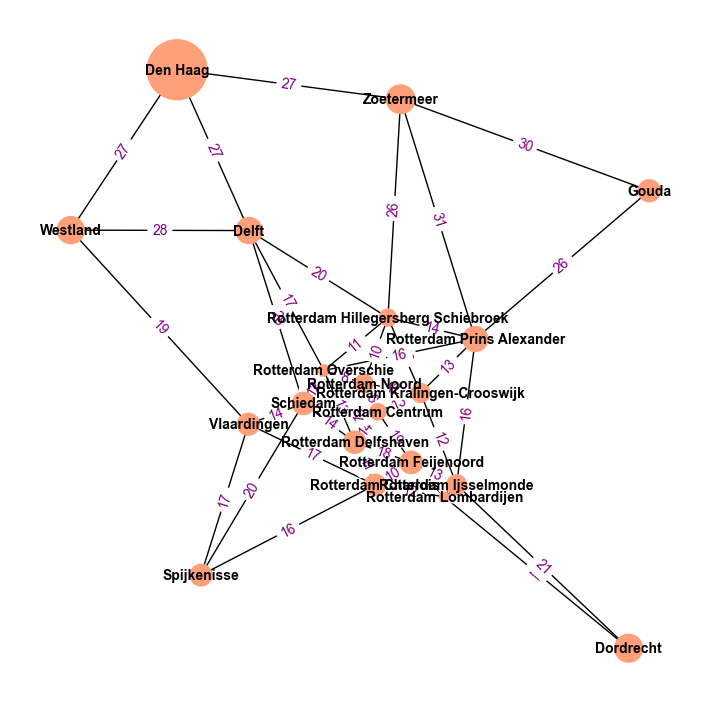

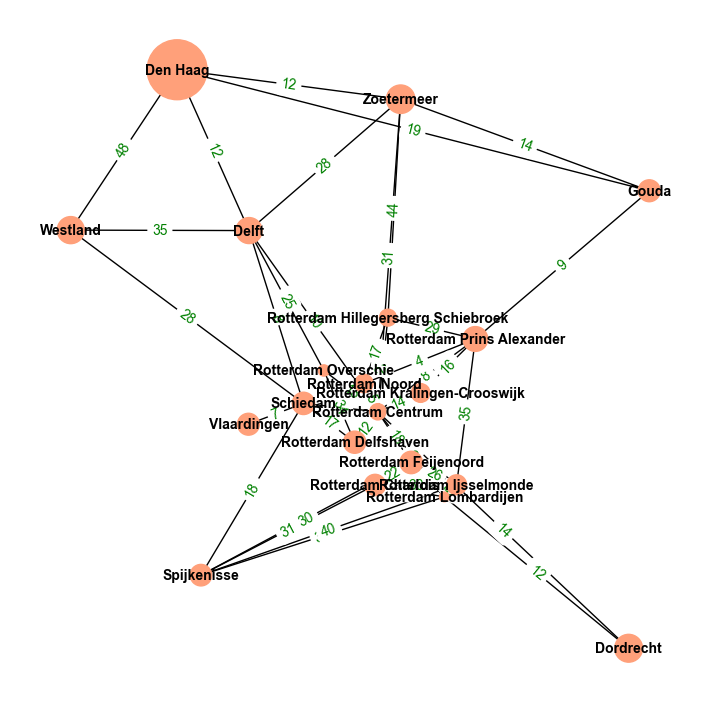

In [22]:
# These functions have been defined in part 1
draw_graph(Rotterdam_car_graph, 'lightsalmon', edge_dictionary=car_dictionary, edge_color='purple')
draw_graph(Rotterdam_ov_graph, 'lightsalmon', edge_dictionary=ov_dictionary, edge_color='green')

### Analysing the two graphs

C:\Users\jvlan\AppData\Local\Temp\ipykernel_35584\2135788565.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betweenness.set_xticklabels(G_betweenness.get_xticklabels(), rotation=90, color='black', ha='center')


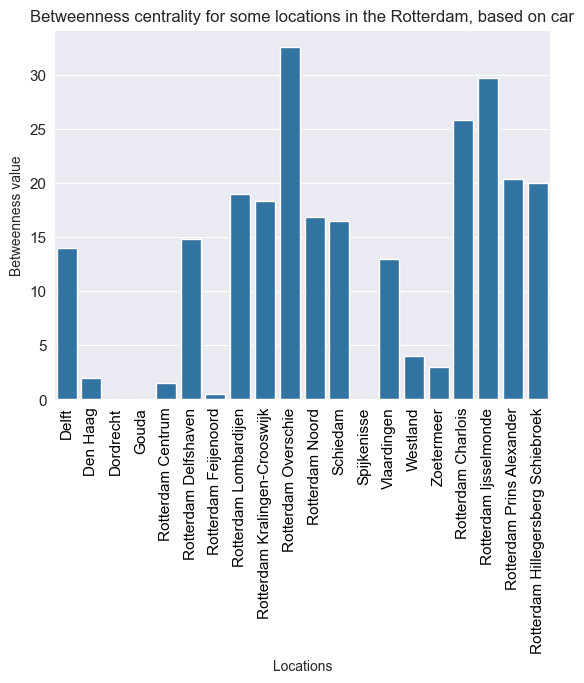

C:\Users\jvlan\AppData\Local\Temp\ipykernel_35584\2135788565.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betweenness.set_xticklabels(G_betweenness.get_xticklabels(), rotation=90, color='black', ha='center')


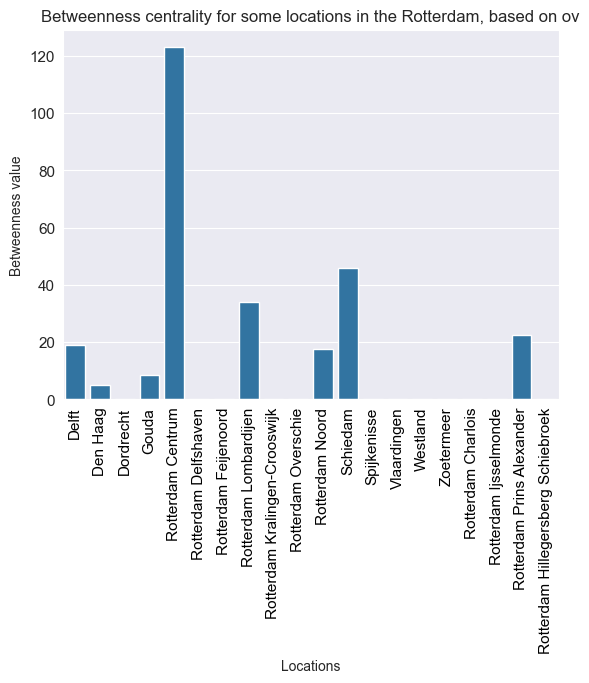

In [23]:
# Betweenness centrality with the car times as factor
plot_betweenness(Rotterdam_car_graph, 'Rotterdam', weight='car')
plot_betweenness(Rotterdam_ov_graph, 'Rotterdam', weight='ov')

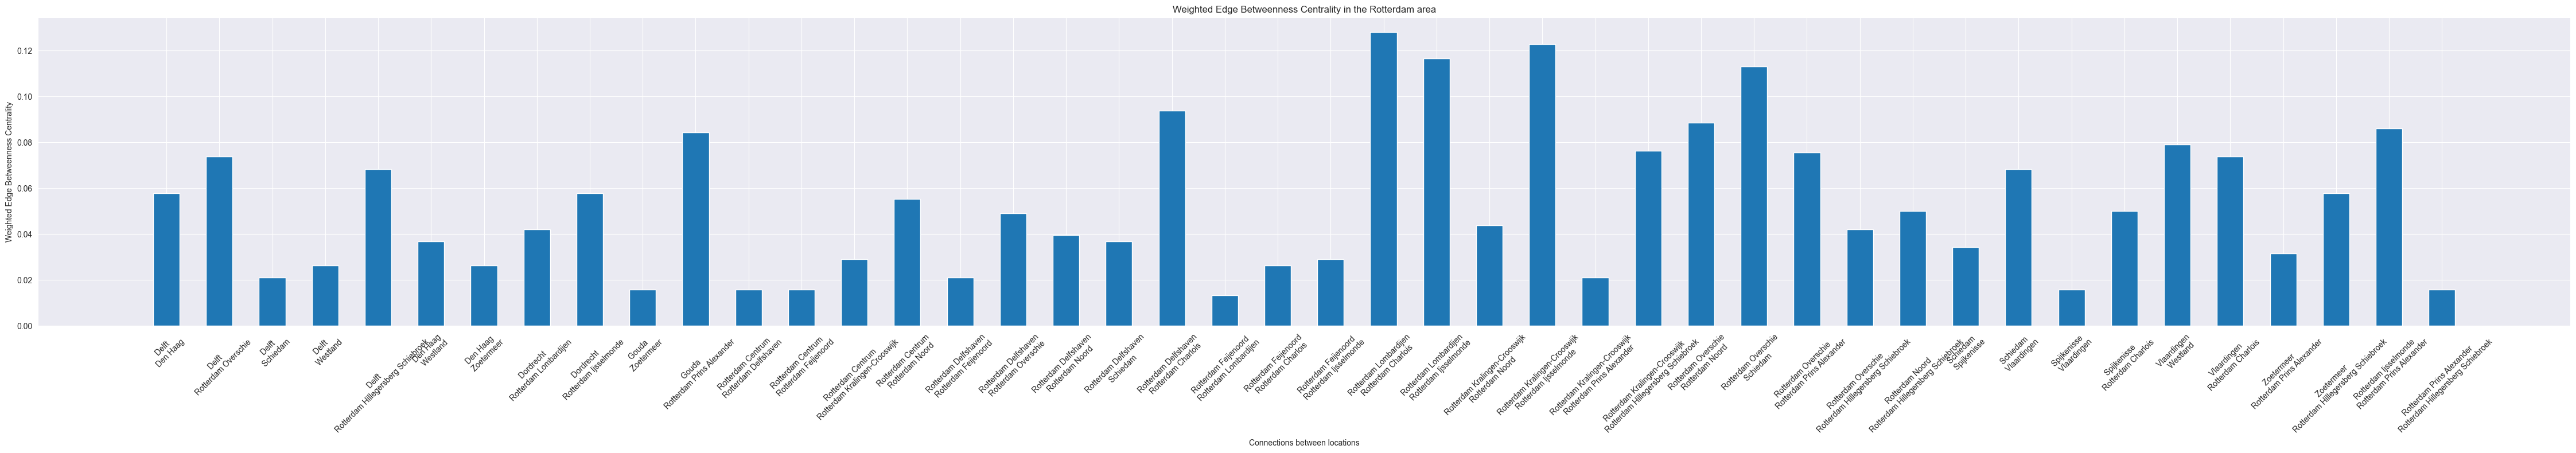

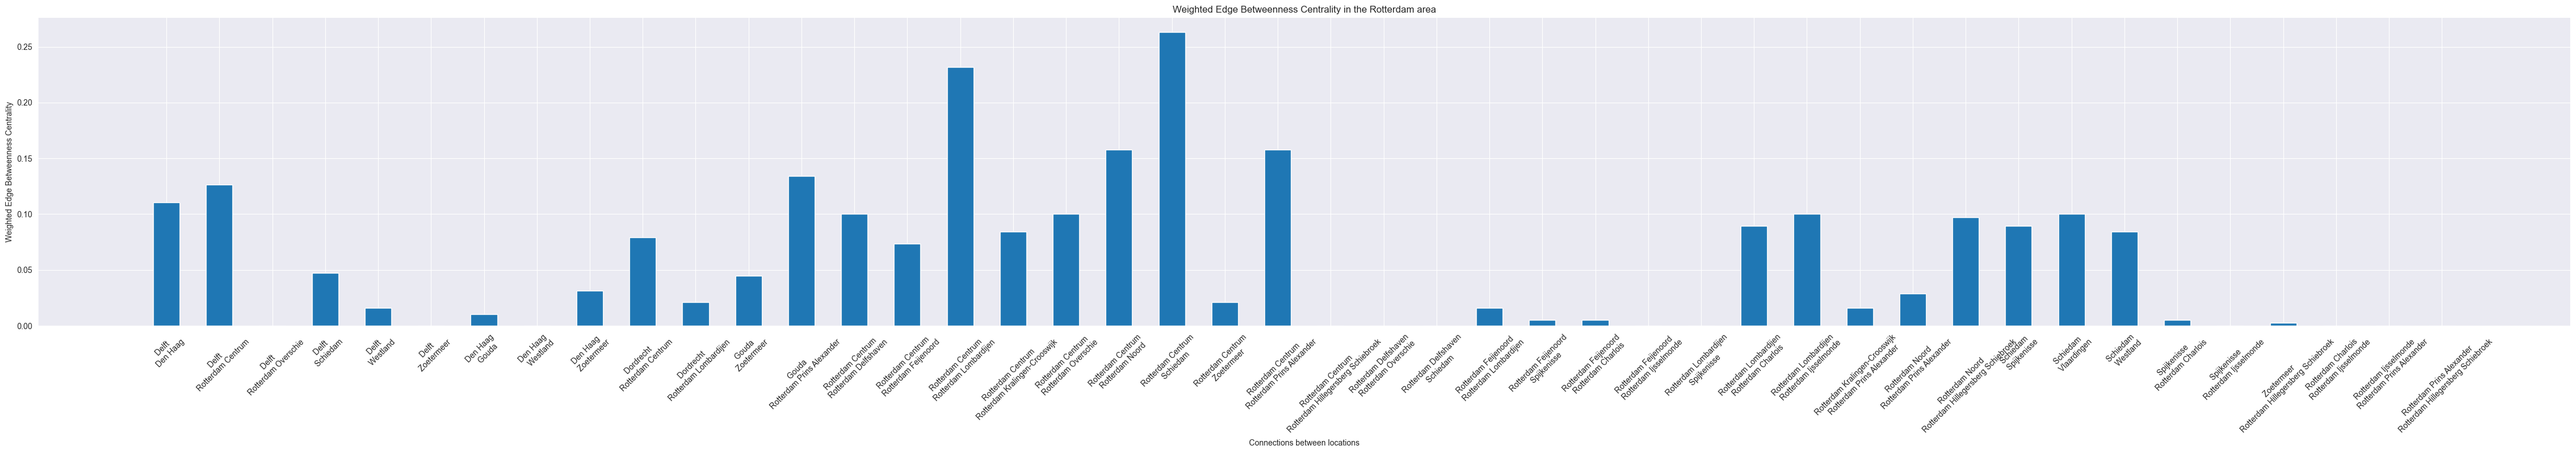

In [24]:
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weighted_car = nx.edge_betweenness_centrality(Rotterdam_car_graph,
                                                               k=None,
                                                               normalized=True,
                                                               weight='car',
                                                               seed=None)
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weighted_ov = nx.edge_betweenness_centrality(Rotterdam_ov_graph,
                                                              k=None,
                                                              normalized=True,
                                                              weight='ov',
                                                              seed=None)

# Plot the values in a bar chart
plt.figure(figsize=(45, 8))
plt.bar(range(len(edge_betweenness_weighted_car)), edge_betweenness_weighted_car.values(), width=0.5)
plt.xticks(range(len(edge_betweenness_weighted_car)), pp_edges(list(edge_betweenness_weighted_car.keys())), rotation=45, ha='center')
plt.title("Weighted Edge Betweenness Centrality in the Rotterdam area")
plt.xlabel("Connections between locations")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.tight_layout()
plt.show()

# Plot the values in a bar chart
plt.figure(figsize=(45, 8))
plt.bar(range(len(edge_betweenness_weighted_ov)), edge_betweenness_weighted_ov.values(), width=0.5)
plt.xticks(range(len(edge_betweenness_weighted_ov)), pp_edges(list(edge_betweenness_weighted_ov.keys())), rotation=45, ha='center')
plt.title("Weighted Edge Betweenness Centrality in the Rotterdam area")
plt.xlabel("Connections between locations")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.tight_layout()
plt.show()

### Investigating the employee travel time in the Rotterdam area

In [25]:
# Creating an alternative path weight function for Rotterdam with different correction variables
def path_weight_part_b(graph, path, weight):
    # The standard path_weight is determined
    path_weight = nx.path_weight(graph, path, weight=weight)
    
    # Corrections for in-between-stops based on the mode of transport, the car times get a reduction, the ov an extra
    # This simulates remaining on the road with a car (so shorter) and changing public transport transfers (an extra)
    total_correction_factor = 0
    correction_factors = {'car': -7, 'ov': 4}
    # Furthermore there are corrections for getting in and out of the transport network based on the last mile problem and parking
    parking_correction = 5
    first_mile_correction = 9
    last_mile_correction = 9
    first_mile_correction_inner_city = 6
    last_mile_correction_inner_city = 6
    
    # These nodes belong to the so called inner city of Rotterdam and have different corrections applied
    correction_exceptions = ['Rotterdam Centrum', 
                             'Rotterdam Feijenoord',
                             'Rotterdam Delftshaven',
                             'Rotterdam Lombardijen',
                             'Rotterdam Kralingen-Crooswijk', 
                             'Rotterdam Noord', 
                             'Rotterdam Charlois', 
                             'Rotterdam Ijsselmonde', 
                             'Rotterdam Hillegersberg Schiebroek']
    
    # The path must have in-between-stops and the weight must be due for a correction
    if len(path) > 2 and weight in list(correction_factors.keys()):
        # Check all in-between-stops
        for node in path[1:-1]:
            # If the node is within Rotterdam, a different correction applies
            if weight == 'car' and node in correction_exceptions:
                total_correction_factor += 0
            elif weight == 'ov' and node in correction_exceptions:
                total_correction_factor += 2
            else:
                total_correction_factor += correction_factors[weight]
    
    if len(path) > 1:
        # Adding a first and last mile public transport correction
        if weight == 'ov':
            if path[1] in correction_exceptions:
                total_correction_factor += first_mile_correction_inner_city
            else:
                total_correction_factor += first_mile_correction
            if path[-1] in correction_exceptions:
                total_correction_factor += last_mile_correction_inner_city
            else:
                total_correction_factor += last_mile_correction
        
        # Adding a parking correction
        if weight == 'car':
            total_correction_factor += parking_correction
        
    # Correct the path weight
    path_weight += total_correction_factor
    
    return path_weight

In [26]:
# A function that calculates the average employee travel time to a selected office based on modality
def travel_time_to_office_per_modality(graph, office, weight):
        
    # Travel amount from selected city for all employees from said city
    total_employee_travel_time = 0
    total_employees = 0
    
    for i, city in enumerate(graph.nodes()):
        
        # It looks at the amount of employees that have to travel to this office
        employees = graph.nodes[city]['employees']
        
        # Paths to office
        path = shortest_path(graph, source=city, target=office, weight=weight)
        
        # The duration of the path
        travel_time = path_weight_part_b(graph, path, weight=weight)
        
        # Tallying the travel time weighted for the employees and said employees
        total_employee_travel_time += travel_time * employees
        total_employees += employees
    
    # Error prevention
    if total_employees != 0:
        average_travel_time = total_employee_travel_time / total_employees
    else:
        average_travel_time = 0
        
    return average_travel_time

In [27]:
# All the locations with the travel times split according to modality
# Now we investigate the average employee travel time to every potential node with their corresponding modes of transport
office_car_time_dict = {}
office_ov_time_dict = {}

for office in Rotterdam_car_graph.nodes():
    travel_time_car = travel_time_to_office_per_modality(Rotterdam_car_graph, office, 'car')
    travel_time_ov = travel_time_to_office_per_modality(Rotterdam_ov_graph, office, 'ov')
    office_car_time_dict.update({office: travel_time_car})
    office_ov_time_dict.update({office: travel_time_ov})

NameError: name 'shortest_path' is not defined

C:\Users\jvlan\AppData\Local\Temp\ipykernel_35584\2600862519.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Car_office_car_times_plot.set_xticklabels(Car_office_car_times_plot.get_xticklabels(), rotation=90, color='black', ha='center')


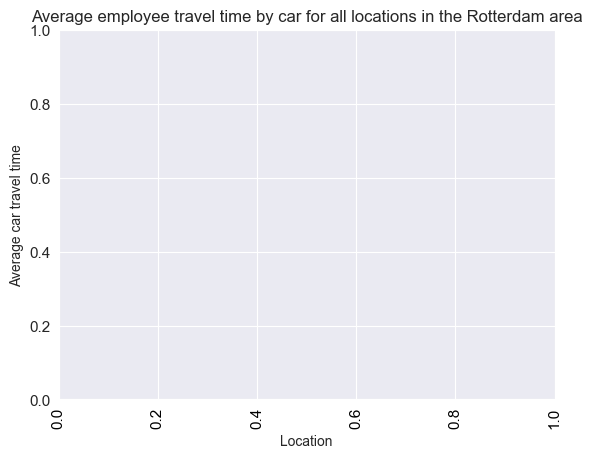

In [39]:
# Plot the values in a bar chart
Car_office_car_times_plot = sns.barplot(office_car_time_dict)
Car_office_car_times_plot.set_title("Average employee travel time by car for all locations in the Rotterdam area")
Car_office_car_times_plot.set_xticklabels(Car_office_car_times_plot.get_xticklabels(), rotation=90, color='black', ha='center')
Car_office_car_times_plot.tick_params(direction='out', pad=2, labelsize=11)
Car_office_car_times_plot.set(xlabel='Location', ylabel='Average car travel time')
plt.show()

C:\Users\jvlan\AppData\Local\Temp\ipykernel_35584\1206336803.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Car_office_ov_times_plot.set_xticklabels(Car_office_ov_times_plot.get_xticklabels(), rotation=90, color='black', ha='center')


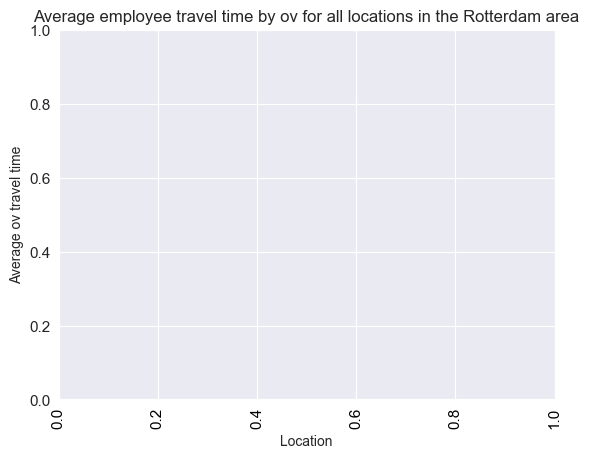

In [40]:
# Plot the values in a bar chart
Car_office_ov_times_plot = sns.barplot(office_ov_time_dict)
Car_office_ov_times_plot.set_title("Average employee travel time by ov for all locations in the Rotterdam area")
Car_office_ov_times_plot.set_xticklabels(Car_office_ov_times_plot.get_xticklabels(), rotation=90, color='black', ha='center')
Car_office_ov_times_plot.tick_params(direction='out', pad=2, labelsize=11)
Car_office_ov_times_plot.set(xlabel='Location', ylabel='Average ov travel time')
plt.show()

# Part B - 2, Mixed Modality


Now we have to invent something to make our dream of mixed modality come true. Our fundamental principle is that traveling employees can take the car before hopping on public transport but not the opposite, since this would be considered unrealistic. We thus work with two graphs, one for the car network and one for the public transport network, yet in our analyses we will use both at the same time to investigate potential use of mixed modality.

### In the following functions, mixing modalities is introduced, so employees can optimise their travel times by combining and/or choosing their fastest mode of transport

##### The following two functions force mixing modalities on the same trip and are used later (first using the car and then switching to public transport)

In [31]:
# Here an auxiliary function is created that forces mixed modality on all modes of travel, so we can investigate the differences of our travel modalities if travels don't optimize for the fasted route

# This function always results in a way of travelling that is of mixed modalities, so first car then ov
def forced_mixed_modality(graph_car, graph_ov, start, stop):
    # The graphs need to be both modalities and properly named
    if not nx.get_edge_attributes(graph_ov, 'ov') or not nx.get_edge_attributes(graph_car, 'car') or not nx.is_connected(graph_ov) or not nx.is_connected(graph_car):
        print('Error! These graphs are not sufficient for this function')
    else:
        # Define the mixed modality correction factor, the extra time it takes to go from car to public transport
        mixed_modality_correction = 5
        shortest_final_len = np.inf
        shortest_final_path = []
        modality = ''
        
        # The dictionary with all shortest public transport times to the destination, regardless of starting point
        all_ov_paths = shortest_path(graph_ov, target=stop, weight='ov')
        
        # To mix modalities we should investigate whether you can drive to any starting point of the public transport network and get the shortest path to the final destination.
        for starting_point_ov, ov_path in all_ov_paths.items():
            ov_path_len = path_weight_part_b(graph_ov, ov_path, weight='ov')
            car_to_start_path = shortest_path(graph_car, source=start, target=starting_point_ov, weight='car')
            car_to_start_len = path_weight_part_b(graph_car, car_to_start_path, weight='car')
            if shortest_final_len > ov_path_len + car_to_start_len + mixed_modality_correction:
                shortest_final_len = ov_path_len + car_to_start_len + mixed_modality_correction
                shortest_final_path = car_to_start_path + shortest_path(graph_ov,source=starting_point_ov, target=stop, weight='ov')
                
        return shortest_final_path, shortest_final_len
    
# This function calculates the average travel time to a location if the way of travelling is mixed modality    
def average_time_forced_mixed_modality(graph_car, graph_ov, office_location):
    
    # Initialize variables
    average_employee_travel_time = 0
    total_employees = 0
    
    # Loop through each city in the Rotterdam graph
    for city, data in graph_car.nodes(data=True):
        
        # Get the number of employees in the city, if there are none, it returns 0
        employees = data.get('employees', 0)
        total_employees += employees
        
        # Calculate the shortest path and modality
        office_path, office_path_length = forced_mixed_modality(graph_car=graph_car, graph_ov=graph_ov, start=city, stop=office_location)
        # Update travel time per city
        average_employee_travel_time += office_path_length * employees
            
    # Calculate average travel time for this office location
    average_employee_travel_time /= total_employees
    
    return average_employee_travel_time

# Create a dictionary with all offices and their corresponding mixed modularity time, like already done for the car and ov
office_forced_mixed_time_dict = {}
for office in Rotterdam_car_graph.nodes():
    variables_mixed = average_time_forced_mixed_modality(Rotterdam_car_graph, Rotterdam_ov_graph, office)
    office_forced_mixed_time_dict.update({office: variables_mixed})


NameError: name 'shortest_path' is not defined

### From here all modes of transport can be chosen based on the fastest route and thus employees can optimise their travel times

In [32]:
# Now we introduce the actual mixed modality function. The key focus being that one can only switch from car to public transport. A traveller can thus effectively only switch ones.
# It is crucial for this function that: 1. one graph is a car network graph and the other a public network graph. 2. Both graphs have the same network nodes. 3. The attributes of these graphs are properly named. 4. Both graphs are connected.

def shortest_path_mixed_modality(graph_car, graph_ov, start, stop):
    # The graphs need to be both modalities and properly named
    if not nx.get_edge_attributes(graph_ov, 'ov') or not nx.get_edge_attributes(graph_car, 'car') or not nx.is_connected(graph_ov) or not nx.is_connected(graph_car):
        print('Error! These graphs are not sufficient for this function')
    else:
        # Define the mixed modality correction factor, the extra time it takes to go from car to public transport
        # This is also handled in the path weight function, but can be adapted here in case that function doesn't properly take park and ride into account
        mixed_modality_correction = 0 
        
        # Shortest paths solely by one modality
        shortest_ov_path = shortest_path(graph_ov, start, stop, 'ov')
        shortest_ov_len = path_weight_part_b(graph_ov, shortest_ov_path, 'ov')
        shortest_car_path = shortest_path(graph_car, start, stop, 'car')
        shortest_car_len = path_weight_part_b(graph_car, shortest_car_path, 'car')
        
        # The ultimately selected paths
        if shortest_ov_len < shortest_car_len:
            shortest_final_path = shortest_ov_path
            shortest_final_len = shortest_ov_len
            modality = 'ov'
        else:
            shortest_final_path = shortest_car_path
            shortest_final_len = shortest_car_len
            modality = 'car'
        
        # The dictionary with all shortest public transport times to the destination, regardless of starting point
        all_ov_paths = shortest_path(graph_ov, target=stop, weight='ov')
        
        # To mix modalities we should investigate whether you can drive to any starting point of the public transport network and get the shortest path to the final destination.
        for starting_point_ov, ov_path in all_ov_paths.items():
            ov_path_len = path_weight_part_b(graph_ov, ov_path, weight='ov')
            car_to_start_path = shortest_path(graph_car, source=start, target=starting_point_ov, weight='car')
            # A very necessary correction, otherwise it would aim to get that modality correction by travelling no nodes.
            if start != starting_point_ov and stop != starting_point_ov:
                car_to_start_len = path_weight_part_b(graph_car, car_to_start_path, weight='car')
                if shortest_final_len > ov_path_len + car_to_start_len + mixed_modality_correction:
                    shortest_final_len = ov_path_len + car_to_start_len + mixed_modality_correction
                    shortest_final_path = car_to_start_path + shortest_path(graph_ov,source=starting_point_ov, target=stop, weight='ov')
                    modality = 'mixed'
                
        return shortest_final_path, shortest_final_len, modality

# Testing area
print(shortest_path_mixed_modality(graph_car=Rotterdam_car_graph, graph_ov=Rotterdam_ov_graph, start='Den Haag', stop='Westland'))
print(shortest_path_mixed_modality(graph_car=Rotterdam_car_graph, graph_ov=Rotterdam_ov_graph, start='Zoetermeer', stop='Rotterdam Centrum'))
print(shortest_path_mixed_modality(graph_car=Rotterdam_car_graph, graph_ov=Rotterdam_ov_graph, start='Westland', stop='Rotterdam Centrum'))

NameError: name 'shortest_path' is not defined

In [ ]:
# Now, with mixed modularity in mind, we can build a function that calculates the location that results in the shortest travel time per employee. Yet again for mixed modularity the previously stated requirements still stand. The node characteristics in both graphs must be the same.
def best_office_all_modalities(graph_car, graph_ov):
    
    # The desired output variables
    final_average_employee_travel_time = np.inf
    final_path_dict = {}
    final_office = ''
    
    # Now all locations in the graph are scanned, which graph that is iterated over doesn't matter, since node characteristics should be the same:
    for potential_office in graph_car.nodes():
        
        # Per potential office find the desired output with auxiliary variables and investigate whether they suit better.
        total_employees = 0
        # The paths will be weighted for the amount of traveling employees per node
        total_weighted_path_len = 0
        path_dict = {}
        
        for starting_point in graph_car.nodes():
            # Per starting node, the values are calculated to the selected office
            path, path_len, modality = shortest_path_mixed_modality(graph_car=graph_car, graph_ov=graph_ov, start=starting_point, stop=potential_office)
            path_dict.update({starting_point: (path, path_len, modality)})
            employees = graph_car.nodes[starting_point]['employees']
            total_employees += employees
            # Calculate and sum the calculated travel time from the starting points to this office
            total_weighted_path_len += path_len * employees
        
        # The weighted employee travel time to this specific office
        potential_office_average_employee_travel_time = total_weighted_path_len / total_employees
        
        # If an office with a shorter (weighted for employee travel time) path is found, this one is selected, including corresponding dictionary and the average travel time
        if final_average_employee_travel_time > potential_office_average_employee_travel_time:
            final_average_employee_travel_time = potential_office_average_employee_travel_time
            final_path_dict = path_dict
            final_office = potential_office
            
    return final_office, final_average_employee_travel_time, final_path_dict

office, average_employee_travel_time, travel_dict = best_office_all_modalities(Rotterdam_car_graph, Rotterdam_ov_graph)
print(f"the final office in these test is {office} with an average employee travel time of {average_employee_travel_time} minutes")
print("The travel patterns per city towards the office are as follows")
print([(i, j[2]) for i,j in travel_dict.items() if i != office])

In [43]:
# Now we investigate the average employee travel time to every potential node whilst taking mixed modalities into consideration
# A function that gives the travel amounts to the closest office only and the average travel amount and also two list of cities each for their closest office respectively
def average_travel_time_per_location_all_modalities(graph_car, graph_ov, office_location):
    # Initialize variables
    average_employee_travel_time = 0
    employee_dict = {'total_employees': 0, 'employees_car': 0, 'employees_ov': 0, 'employees_mixed': 0}
    
    # Loop through each city in the Rotterdam graph
    for city, data in graph_car.nodes(data=True):
        # Get the number of employees in the city, if there are none, it returns 0
        employees = data.get('employees', 0)
        
        # Calculate the shortest path and modality
        office_path, office_path_length, modality = shortest_path_mixed_modality(graph_car=graph_car, graph_ov=graph_ov, start=city, stop=office_location)
        
        # Update travel time per city
        average_employee_travel_time += office_path_length * employees
        
        # Categorize the traveling employees to this office
        employee_dict['total_employees'] += employees
        if modality == 'car':
            employee_dict['employees_car'] += employees
        elif modality == 'ov':
            employee_dict['employees_ov'] += employees
        elif modality == 'mixed':
            employee_dict['employees_mixed'] += employees
            
    # Calculate average travel time for this office location
    if employee_dict['total_employees'] != 0:
        average_employee_travel_time /= employee_dict['total_employees']
    
    return average_employee_travel_time, employee_dict

average_travel_time_per_location_all_modalities(graph_car=Rotterdam_car_graph, graph_ov=Rotterdam_ov_graph, office_location='Rotterdam Centrum')

NameError: name 'shortest_path' is not defined

### Now we investigate all modes of optimised travel times

In [42]:
# Now we investigate the average employee travel time to every potential office considering mixed modality
# Before plots are shown, we prepare auxiliary variables for the plotting
office_all_modalities_time_dict = {}
office_all_modalities_dict = {}

for office in Rotterdam_car_graph.nodes():
    variables = average_travel_time_per_location_all_modalities(graph_car=Rotterdam_car_graph, graph_ov=Rotterdam_ov_graph, office_location=office)
    travel_time = variables[0]
    modality_dict = variables[1]
    
    total_employees = modality_dict['total_employees']
    percentage_car = 100 * modality_dict['employees_car'] / total_employees
    percentage_ov = 100 * modality_dict['employees_ov'] / total_employees
    percentage_mixed = 100 * modality_dict['employees_mixed'] / total_employees
    
    office_all_modalities_time_dict[office] = travel_time
    office_all_modalities_dict[office] = {'car': percentage_car, 'ov': percentage_ov, 'mixed': percentage_mixed}

# Plot the values in a stacked bar chart
locations = list(office_all_modalities_dict.keys())
travel_times = list(office_all_modalities_time_dict.values())

# Create an array to store the heights of each segment
car_percentages = np.array([office_all_modalities_dict[loc]['car'] for loc in locations])
ov_percentages = np.array([office_all_modalities_dict[loc]['ov'] for loc in locations])
mixed_percentages = np.array([office_all_modalities_dict[loc]['mixed'] for loc in locations])

NameError: name 'average_travel_time_per_location_all_modalities' is not defined

In [ ]:
# Plot the values in a bar chart
pallete_ov = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.75, reverse=True, as_cmap=True)
Office_mixed_times_plot = sns.barplot(x=locations, y=travel_times, hue=ov_percentages, palette=pallete_ov)
Office_mixed_times_plot.legend(title='OV travellers (%)', loc='lower right')
Office_mixed_times_plot.set_title("Average employee travel time to all locations in the Rotterdam area and OV use")
Office_mixed_times_plot.set_xticklabels(Office_mixed_times_plot.get_xticklabels(), rotation=90, color='black', ha='center')
Office_mixed_times_plot.tick_params(direction='out', pad=2, labelsize=11)
Office_mixed_times_plot.set(xlabel='Location', ylabel='Average travel time')
plt.show()

In [41]:
# Plot the stacked bar chart with all modalities mixed and the travel times
plt.bar(locations, car_percentages, color='blue', label='Car')
plt.bar(locations, ov_percentages, bottom=car_percentages, color='orange', label='OV')
plt.bar(locations, mixed_percentages, bottom=(car_percentages + ov_percentages),  color='green', label='Park and Ride')

# Create a legend
plt.legend(title='Relative mode of Travel', loc='lower right')

# Set plot title and axis labels
plt.title("Modes of travel to all locations in the Rotterdam area")
plt.xlabel('Location')
plt.ylabel('Mode of travel (%)')
plt.xticks(rotation=90)
plt.show()

NameError: name 'locations' is not defined

In [ ]:
# Plot the stacked bar chart with all modalities mixed and the travel times
plt.bar(locations, car_percentages * travel_times / 100, color='blue', label='Car')
plt.bar(locations, ov_percentages * travel_times / 100, bottom=car_percentages * travel_times / 100, color='orange', label='OV')
plt.bar(locations, mixed_percentages * travel_times / 100, bottom=(car_percentages + ov_percentages) * travel_times / 100, color='green', label='Park and Ride')

# Create a legend
plt.legend(title='Relative mode of Travel', loc='lower right')

# Set plot title and axis labels
plt.title("Employee mode and travel time to all potential office places in the Rotterdam area")
plt.xlabel('Location')
plt.ylabel('Average travel time')
plt.xticks(rotation=90)
plt.show()

##### Here we split the modalities again, forcing employees one way of travelling and showing the difference between this and optimal speeds from the previous part

In [35]:
# All the locations with the travel times split according to modality
# Now we investigate the average employee travel time to every potential node with all three types of modalities forced
forced_all_modalities_data = []
for i, office in enumerate(Rotterdam_car_graph.nodes()):
    forced_all_modalities_data.append({'Location': office, 'Modality': 'All employees park and ride', 'Travel Time': office_forced_mixed_time_dict[office]})
    forced_all_modalities_data.append({'Location': office, 'Modality': 'All employees car', 'Travel Time': office_car_time_dict[office]})
    forced_all_modalities_data.append({'Location': office, 'Modality': 'All employees ov', 'Travel Time': office_ov_time_dict[office]})
    forced_all_modalities_data.append({'Location': locations[i], 'Modality': 'Optimal', 'Travel Time': travel_times[i]})

df_forced_modality_travel_times = pd.DataFrame(forced_all_modalities_data)
plt.figure(figsize=(15, 5))
forced_travel_plot = sns.barplot(data=df_forced_modality_travel_times, x='Location', y='Travel Time', hue='Modality')
forced_travel_plot.legend(title='Modality')
forced_travel_plot.set_title("Average employee travel time to all locations whilst mixing modalities or not")
forced_travel_plot.set_xticklabels(forced_travel_plot.get_xticklabels(), rotation=90, color='black', ha='center')
forced_travel_plot.tick_params(direction='out', pad=2, labelsize=11)
plt.show()

KeyError: 'Delft'

### Going deeper into non optimised travel: mixing employee modalities regardless of location of origin. Splitting modalities across all employees equally.

In the previous parts, one fundamental assumption was made. That all employees from the same location would travel with the same modality. This, of course, does not reflect reality as people have personal preference and will implement these, even if this means that they will be (slightly) slower. In the following part, analysis is done based on splitting modalities across all locations: __E.G. It is defined that there is an 80%-20% split of car and public transport. Then for every location of the Rotterdam area 80% of the employees will travel to the selected office by car and 20% by public transport.__

In [36]:
# This function will calculate the average employee travel times, split by modality for a selected destination
def average_travel_time_per_split_modality(graph_car, graph_ov, split, destination):
    
    # The split variable must be a tuple or list with length 2 or 3 that determines the proportion of employees traveling per modality
    employees_car_split = split[0]
    employees_ov_split = split[1]
    
    # If mixing modalities on the same trip is also considered then this must be the last value in the split
    if len(split) == 3:
        employees_mixed_split = split[2]
        forced_mixed_travel_time = average_time_forced_mixed_modality(graph_car, graph_ov, destination)
    else:
        employees_mixed_split = 0
        forced_mixed_travel_time = 0
    
    # calculate the travel time to the selected destination for all modalities
    car_travel_time = travel_time_to_office_per_modality(graph_car, destination, 'car')
    ov_travel_time = travel_time_to_office_per_modality(graph_ov, destination, 'ov')
    
    # Now calculate the travel time based on the employee split. The reason that you can split the travel times directly is because employees across all locations are split equally. Their total amount therefore doesn't matter. And thus the average travel time per modality will remain the same. Whether 10 or 10 million employees travel by car the average travel time remains constant, since the inner distribution of these employees remains the same; employees across all locations are still distributed in their original proportions. The only thing that matters is the proportion towards the other modalities and so the average travel time per modality can thus be directly weighted and calculated based on this proportion. 
    weighted_employee_travel_time = car_travel_time * employees_car_split + ov_travel_time * employees_ov_split + forced_mixed_travel_time * employees_mixed_split
    
    return weighted_employee_travel_time

print(f"The average travel time to Dordrecth based on a 60-40 percent car-ov split is {average_travel_time_per_split_modality(Rotterdam_car_graph, Rotterdam_ov_graph, (0.60, 0.40), 'Dordrecht')} minutes")

NameError: name 'shortest_path' is not defined

In [ ]:
# This code block creates a DataFrame for every location over the amount of chosen splits in the list_of_splits

# The first value in the tuple is the car percentage, the second the OV percentage
list_of_splits = [(round((0.01*i), 2),round(0.01*(100-i), 2)) for i in range(0,105,5)]

# We have to ensure that the columns have a numeric value, in this case the car percentage is chosen.
df_split_modalities = pd.DataFrame(columns=[100 * i[1] for i in list_of_splits])

# For every office destination and for every determined split the weighted employee travel time will be calculated.
for office in Rotterdam_car_graph.nodes():
    # Creating a list is necessary to create a dataframe with all present splits. DF are best created from lists.
    office_list = []
    for split in list_of_splits:
        weighted_employee_travel_time = average_travel_time_per_split_modality(Rotterdam_car_graph, Rotterdam_ov_graph, split, office)
        office_list.append(weighted_employee_travel_time)
    # With .loc you can add data per row in a dataframe, if the columns and the data list length match.
    df_split_modalities.loc[office] = office_list

df_split_modalities

In [ ]:
# Reshape DataFrame from wide to long format to plot it properly in a line plot
df_split_modalities_long = df_split_modalities.reset_index().melt(id_vars='index', var_name='OV Percentage', value_name='Travel Time')

# Plotting the long dataframe in a line plot (since the relation is in this case continuous and linear.)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_split_modalities_long, x='OV Percentage', y='Travel Time', hue='index', palette='tab20')
plt.xlabel('Percentage of Employees traveling by Public Transport')
plt.ylabel('Weighted Employee Travel Time')
plt.title('Weighted Employee Travel Time for Different Proportions of Car and Public Transport')
plt.legend(title='Office Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
# Only selecting a couple of offices to make a clearer plot
df_split_modalities_long_selection = df_split_modalities_long.loc[(df_split_modalities_long['index'] == 'Delft') | (df_split_modalities_long['index'] == 'Rotterdam Centrum') | (df_split_modalities_long['index'] == 'Rotterdam Noord') | (df_split_modalities_long['index'] == 'Rotterdam Overschie')]

# Plotting the long dataframe in a line plot (since the relation is in this case continuous and linear.)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_split_modalities_long_selection, x='OV Percentage', y='Travel Time', hue='index')
plt.xlabel('Percentage of Employees traveling by Public Transport')
plt.ylabel('Weighted Employee Travel Time')
plt.title('Weighted Employee Travel Time for Most Relevant Offices')
plt.legend(title='Office Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

NameError: name 'df_split_modalities_long' is not defined

# Part C - Property Prices and Location Attractiveness

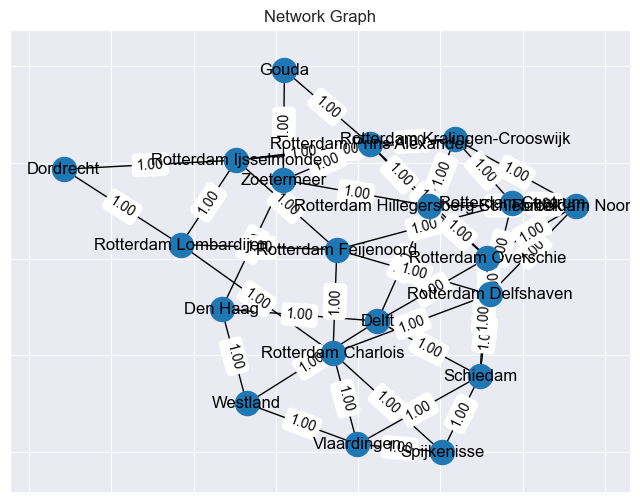

PageRank: {'Delft': 0.056487212657149205, 'Den Haag': 0.03814039194235265, 'Dordrecht': 0.027431821355621937, 'Gouda': 0.02712804000553548, 'Rotterdam Centrum': 0.044066119513383295, 'Rotterdam Delfshaven': 0.06326178087140771, 'Rotterdam Feijenoord': 0.055381902953510476, 'Rotterdam Lombardijen': 0.047941734558865835, 'Rotterdam Kralingen-Crooswijk': 0.05402944148013417, 'Rotterdam Overschie': 0.06292665790305119, 'Rotterdam Noord': 0.05296823603920887, 'Schiedam': 0.055528685553846685, 'Spijkenisse': 0.036711279468288664, 'Vlaardingen': 0.047749280352888356, 'Westland': 0.038056714792844455, 'Zoetermeer': 0.04825271346729489, 'Rotterdam Charlois': 0.056613401690124646, 'Rotterdam Ijsselmonde': 0.05731971908119604, 'Rotterdam Prins Alexander': 0.06616982918269554, 'Rotterdam Hillegersberg Schiebroek': 0.06383503713059985}
Betweenness Centrality: {'Delft': 0.08788638262322472, 'Den Haag': 0.021247563352826508, 'Dordrecht': 0.0, 'Gouda': 0.0210108604845447, 'Rotterdam Centrum': 0.471567

In [50]:
# Calculate PageRank
pagerank_car = nx.pagerank(Rotterdam_car_graph)
pagerank_ov = nx.pagerank(Rotterdam_ov_graph)

# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(Rotterdam_car_graph)
betweenness_centrality = nx.betweenness_centrality(Rotterdam_ov_graph)
# Visualize the graph with node labels
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(Rotterdam_car_graph)  # Positioning of the nodes
nx.draw_networkx(Rotterdam_car_graph, pos, with_labels=True)
nx.draw_networkx_edge_labels(Rotterdam_car_graph, pos, edge_labels={(u, v): f'{d:.2f}' for u, v, d in Rotterdam_car_graph.edges(data='weight', default=1)})
plt.title('Network Graph')
plt.show()

# Output the calculated properties
print("PageRank:", pagerank_car)
print("Betweenness Centrality:", betweenness_centrality)


C:\Users\jvlan\AppData\Local\Temp\ipykernel_35584\2135788565.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betweenness.set_xticklabels(G_betweenness.get_xticklabels(), rotation=90, color='black', ha='center')


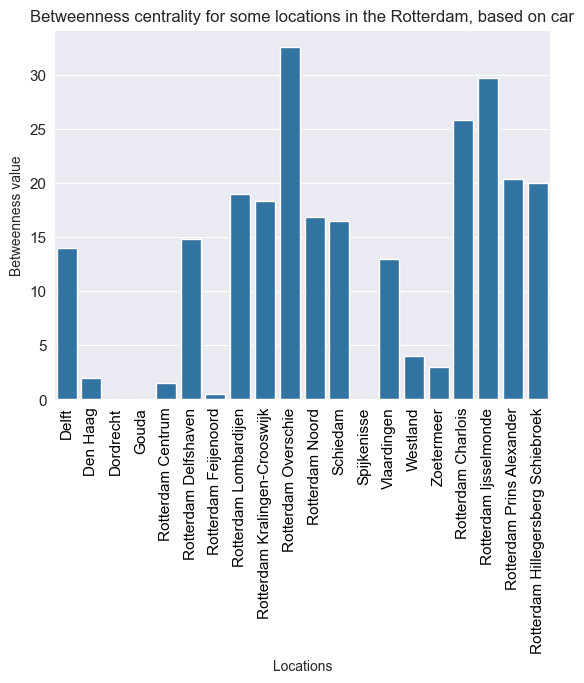

C:\Users\jvlan\AppData\Local\Temp\ipykernel_35584\2135788565.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betweenness.set_xticklabels(G_betweenness.get_xticklabels(), rotation=90, color='black', ha='center')


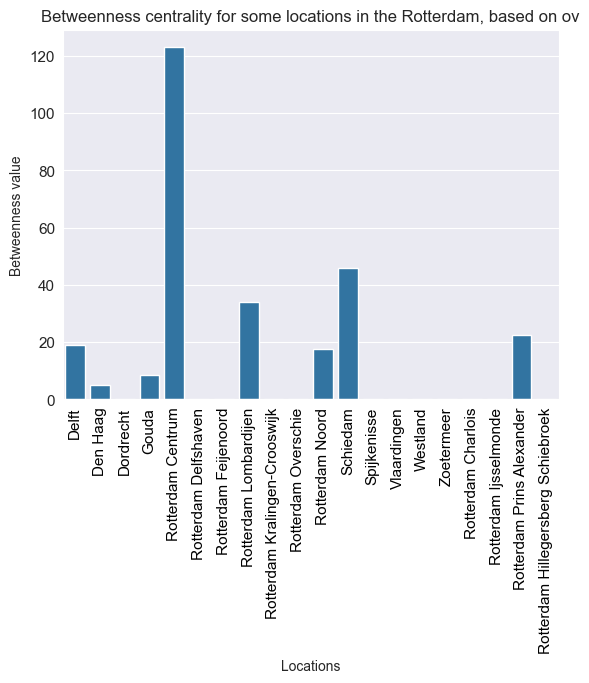

In [48]:
# Betweenness centrality with the car times as factor
plot_betweenness(Rotterdam_car_graph, 'Rotterdam', weight='car')
plot_betweenness(Rotterdam_ov_graph, 'Rotterdam', weight='ov')

In [55]:
def plot_pagerank(graph, graph_name, weight=None):
    # Calculate the PageRank
    pagerank = nx.pagerank(graph)
    
    # Convert the PageRank dictionary to a pandas DataFrame for easier plotting with seaborn
    df_pagerank = pd.DataFrame(list(pagerank.items()), columns=['Location', 'PageRankValue'])
    df_pagerank = df_pagerank.sort_values('PageRankValue', ascending=True)
    
    # Plot the values in a bar chart
    plt.figure(figsize=(10, 8))
    pagerank_plot = sns.barplot(data=df_pagerank, x='PageRankValue', y='Location', palette='viridis')
    pagerank_plot.set_title(f"PageRank for locations in the {graph_name}, based on {weight}")
    pagerank_plot.set_xlabel('PageRank Value')
    pagerank_plot.set_ylabel('Locations')
    plt.show()

# Example usage, ensure you have a network graph defined as Randstad_Graph
# plot_pagerank(Randstad_Graph, 'Randstad')


C:\Users\jvlan\AppData\Local\Temp\ipykernel_35584\2818613450.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  pagerank_plot = sns.barplot(data=df_pagerank, x='PageRankValue', y='Location', palette='viridis')


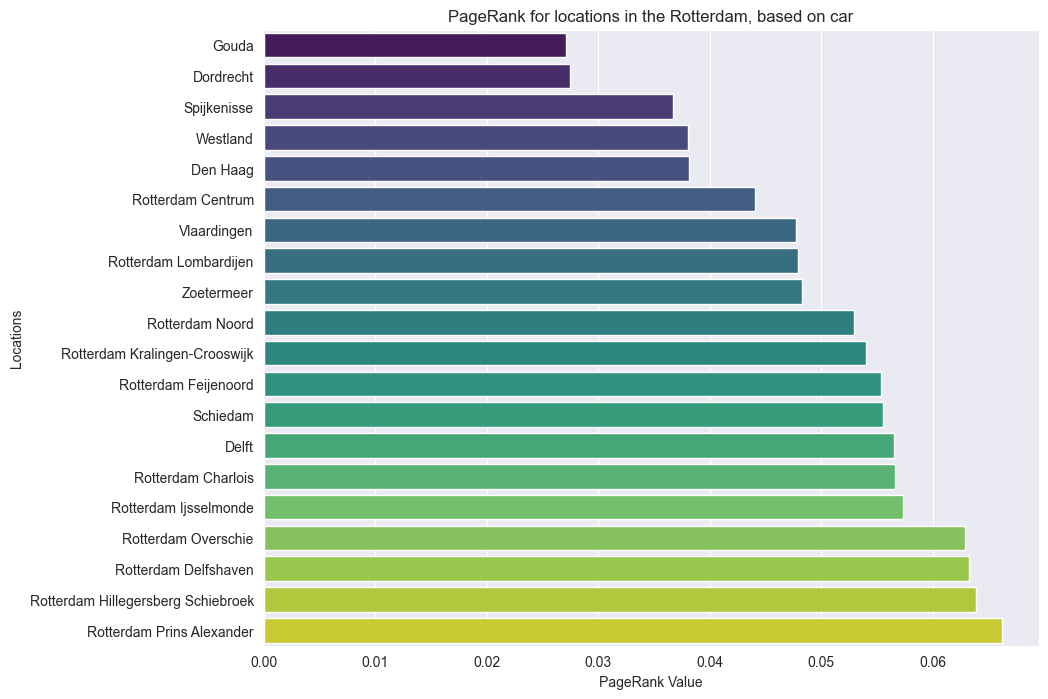

C:\Users\jvlan\AppData\Local\Temp\ipykernel_35584\2818613450.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  pagerank_plot = sns.barplot(data=df_pagerank, x='PageRankValue', y='Location', palette='viridis')


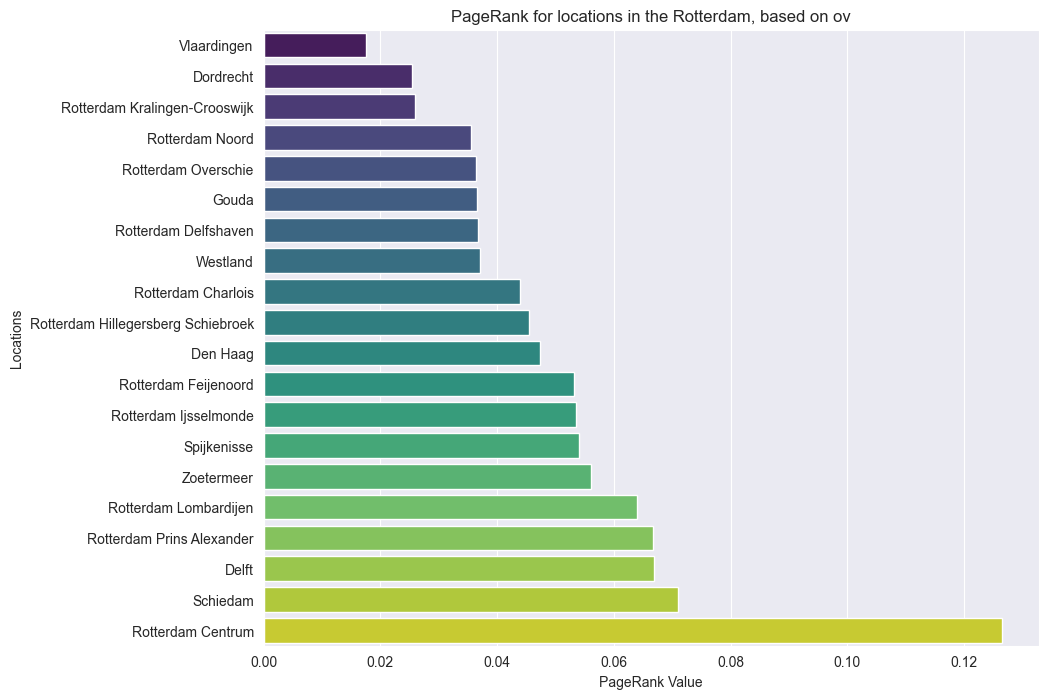

In [56]:
# Betweenness centrality with the car times as factor
plot_pagerank(Rotterdam_car_graph, 'Rotterdam', weight='car')
plot_pagerank(Rotterdam_ov_graph, 'Rotterdam', weight='ov')